# SALARY

A salary is a form of periodic payment from an employer to an employee, which may be specified in an employment contract. It is contrasted with piece wages, where each job, hour or other unit is paid separately, rather than on a periodic basis. From the point of view of running a business, salary can also be viewed as the cost of acquiring and retaining human resources for running operations, and is then termed personnel expense or salary expense. In accounting, salaries are recorded in payroll accounts.

Salary is a fixed amount of money or compensation paid to an employee by an employer in return for work performed. Salary is commonly paid in fixed intervals, for example, monthly payments of one-twelfth of the annual salary.

Salary is typically determined by comparing market pay rates for people performing similar work in similar industries in the same region. Salary is also determined by leveling the pay rates and salary ranges established by an individual employer. Salary is also affected by the number of people available to perform the specific job in the employer's employment locale

In [1]:
import pandas as pd
import numpy as np

In [4]:
import pandas as pd
import numpy as np
path ='https://raw.githubusercontent.com/dsrscientist/dataset3/main/Salaries.csv'
df = pd.read_csv(path)

In [5]:
df

,rank,discipline,yrs.since.phd,yrs.service,sex,salary
0,Prof,B,19,18,Male,139750
1,Prof,B,20,16,Male,173200
2,AsstProf,B,4,3,Male,79750
3,Prof,B,45,39,Male,115000
4,Prof,B,40,41,Male,141500
...,...,...,...,...,...,...
392,Prof,A,33,30,Male,103106
393,Prof,A,31,19,Male,150564
394,Prof,A,42,25,Male,101738
395,Prof,A,25,15,Male,95329


In [6]:
df.columns

Index(['rank', 'discipline', 'yrs.since.phd', 'yrs.service', 'sex', 'salary'], dtype='object')

In [7]:
df.head()

,rank,discipline,yrs.since.phd,yrs.service,sex,salary
0,Prof,B,19,18,Male,139750
1,Prof,B,20,16,Male,173200
2,AsstProf,B,4,3,Male,79750
3,Prof,B,45,39,Male,115000
4,Prof,B,40,41,Male,141500


# Details about the Columns

1. Rank..

This columns shows the diffrent Designation for which PayScale is decided.

2. Discipline..  

This column shows the branch of knowledge, typically one studied in higher education.

3. Yrs.Since.Phd    

This columns shows the shows the number of years a person already has its Phd.

4. Yrs.Service

This Column shows the Years of Service means the total number of full years in which a Employee has been employed

5. Sex

This Columns show the gender category of the employee..

6. Salary

This Column shows the pay scale of the employee of the dataset

In [8]:
df.isnull().sum()

rank             0
discipline       0
yrs.since.phd    0
yrs.service      0
sex              0
salary           0
dtype: int64

# Transforming Datatypes of The Dataset into same format .ie. Categorical to Numerical For better Analysis

In [9]:
df.dtypes

rank             object
discipline       object
yrs.since.phd     int64
yrs.service       int64
sex              object
salary            int64
dtype: object

In [10]:
from sklearn.preprocessing import LabelEncoder
le =LabelEncoder()

list1=['rank','discipline','sex']
for val in list1:
  df[val]=le.fit_transform(df[val].astype(str))

In [11]:
df.head()

,rank,discipline,yrs.since.phd,yrs.service,sex,salary
0,2,1,19,18,1,139750
1,2,1,20,16,1,173200
2,1,1,4,3,1,79750
3,2,1,45,39,1,115000
4,2,1,40,41,1,141500


In [12]:
df.tail()

,rank,discipline,yrs.since.phd,yrs.service,sex,salary
392,2,0,33,30,1,103106
393,2,0,31,19,1,150564
394,2,0,42,25,1,101738
395,2,0,25,15,1,95329
396,1,0,8,4,1,81035


# EDA

Scatter Plot

<AxesSubplot:xlabel='rank', ylabel='salary'>

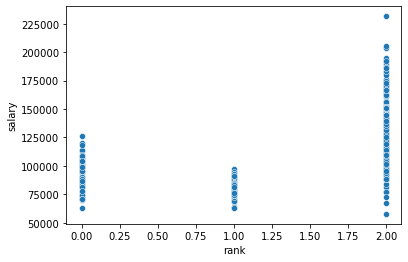

In [13]:
import seaborn as sns
sns.scatterplot(x="rank",y="salary",data=df)

We can see that the data is only concentrated in three positions which are ..

1. Indicating Values for ASSOCIATE PROFESSOR..
2. Indicating Values for ASSISTANT PROFESSOR..
3. Indicating Values for PROFESSOR..

We can also see that the no of Professors are the Max and the Min is of Asstnt Professor

<AxesSubplot:xlabel='discipline', ylabel='salary'>

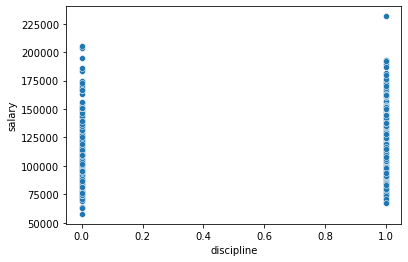

In [14]:
sns.scatterplot(x="discipline",y="salary",data=df)

<AxesSubplot:xlabel='yrs.since.phd', ylabel='salary'>

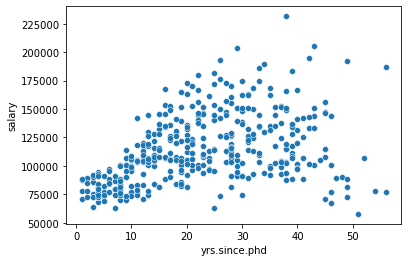

In [15]:
sns.scatterplot(x="yrs.since.phd",y="salary",data=df)

From the above plot we can see that the data is Linearly Coorelated and is more densly distributed betweeen the range of 2 to 45 with Gradient Ascend as no. of year increases

<AxesSubplot:xlabel='yrs.service', ylabel='salary'>

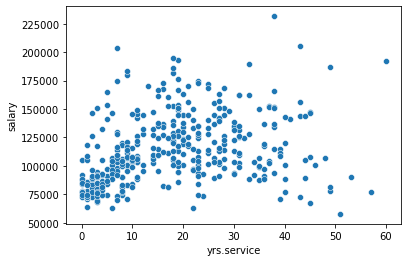

In [16]:
sns.scatterplot(x="yrs.service",y="salary",data=df)

From the above plot we can see that the Data is densly populated in the range of 0 to 30

<AxesSubplot:xlabel='sex', ylabel='salary'>

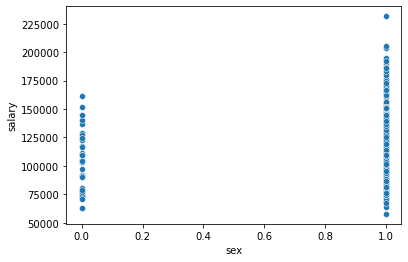

In [17]:
sns.scatterplot(x="sex",y="salary",data=df)

From the above we can see that the Male (1) has the max points while Female (0) is only upto the range of 150000

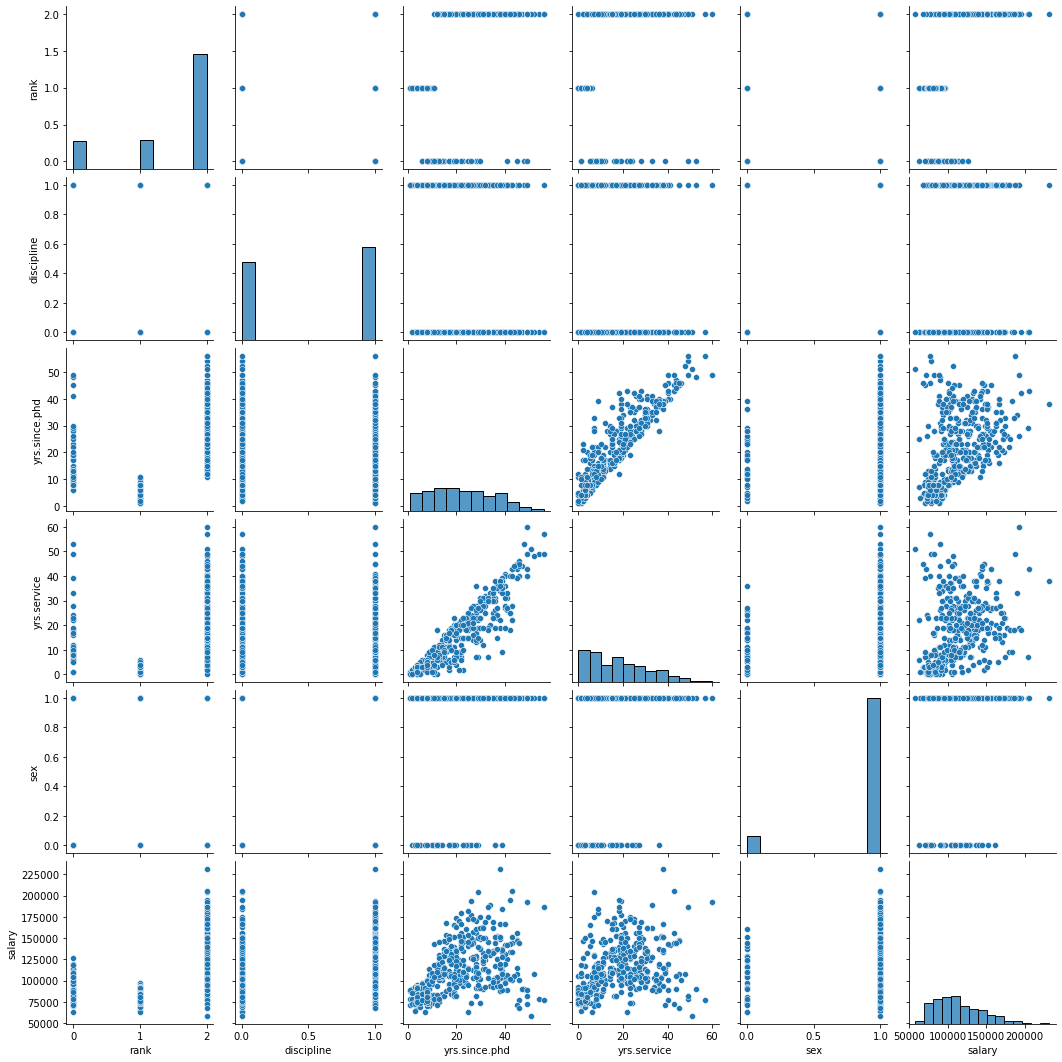

In [18]:
sns.pairplot(df)

# Coorelation

In [19]:
df.corr()

,rank,discipline,yrs.since.phd,yrs.service,sex,salary
rank,1.000000,-0.086266,0.525500,0.447499,0.132492,0.522207
discipline,-0.086266,1.000000,-0.218087,-0.164599,0.003724,0.156084
yrs.since.phd,0.525500,-0.218087,1.000000,0.909649,0.148788,0.419231
yrs.service,0.447499,-0.164599,0.909649,1.000000,0.153740,0.334745
sex,0.132492,0.003724,0.148788,0.153740,1.000000,0.138610
salary,0.522207,0.156084,0.419231,0.334745,0.138610,1.000000


In [20]:
df.corr()['salary'].sort_values()

sex              0.138610
discipline       0.156084
yrs.service      0.334745
yrs.since.phd    0.419231
rank             0.522207
salary           1.000000
Name: salary, dtype: float64

<AxesSubplot:>

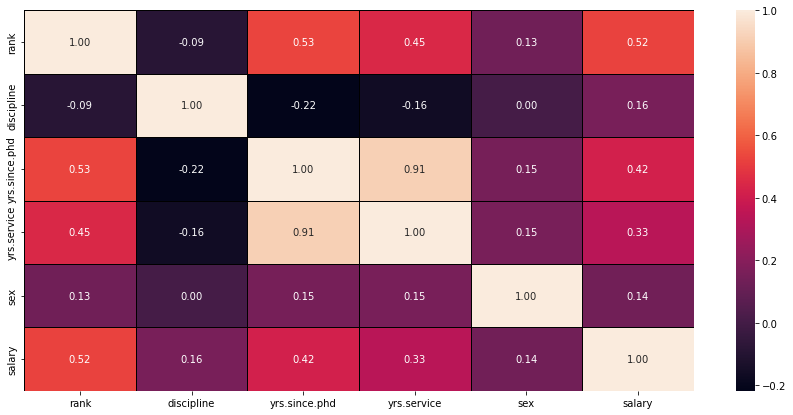

In [21]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,7))
sns.heatmap(df.corr(), annot=True, linewidths=0.5,linecolor="black", fmt='.2f')

# Out Come of Correlation

All the Columns are Positively Coorelated with the Salary

1. Rank has a Correlation of 52 percent with Salary which can be considered as a Strong Bond..

2. Discipline has a Correlation of 16 percent with Salary which can be considered as a Good Bond..

3. Yrs_since_Phd has a Correlation of 42 percent with Salary which can be considered as a strong bond..

4. Yrs_Service has a Correlation of 33 percent with Salary which can be considered as a strong Bond..

5. Sex has a Correlation of 14 percent with Salary which can be considered as a Good Bond..

* Max Correlation - Rank
* Min Coorelation - Sex

# Descriptive Statistics

Describing Datasets

In [23]:
df.describe()

,rank,discipline,yrs.since.phd,yrs.service,sex,salary
count,397.000000,397.000000,397.000000,397.000000,397.000000,397.000000
mean,1.508816,0.544081,22.314861,17.614610,0.901763,113706.458438
std,0.757486,0.498682,12.887003,13.006024,0.298010,30289.038695
min,0.000000,0.000000,1.000000,0.000000,0.000000,57800.000000
25%,1.000000,0.000000,12.000000,7.000000,1.000000,91000.000000
50%,2.000000,1.000000,21.000000,16.000000,1.000000,107300.000000
75%,2.000000,1.000000,32.000000,27.000000,1.000000,134185.000000
max,2.000000,1.000000,56.000000,60.000000,1.000000,231545.000000


<AxesSubplot:>

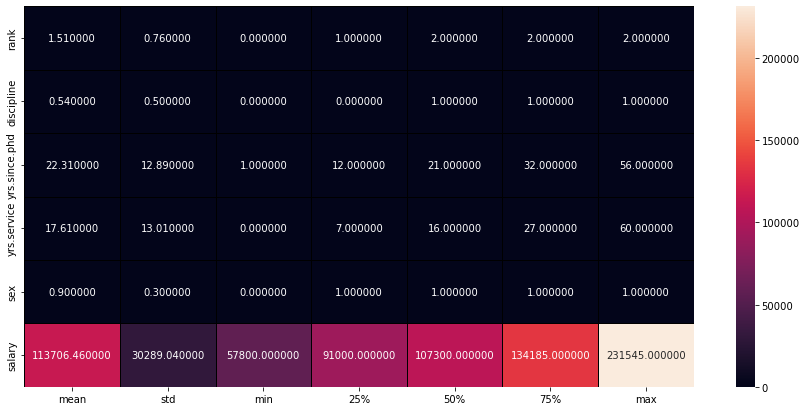

In [24]:
plt.figure(figsize=(15,7))
sns.heatmap(round(df.describe()[1:].transpose(),2), annot=True, linewidths=0.5,linecolor="black", fmt='f')

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 397 entries, 0 to 396
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   rank           397 non-null    int32
 1   discipline     397 non-null    int32
 2   yrs.since.phd  397 non-null    int64
 3   yrs.service    397 non-null    int64
 4   sex            397 non-null    int32
 5   salary         397 non-null    int64
dtypes: int32(3), int64(3)
memory usage: 14.1 KB


# Out Come of Describe Datasets

From the above plotting we are determining mean Standard Deviation , minimum and maximum value of each column. It Helps further in data cleaning ..

From the above plotting we are determining mean Standard Deviation , minimum and maximum value of each column. It Helps further in data cleaning ..

* Total Numbers of rows in the Datasets are : -


   397 Rows

   6 Columns


* Rank : -

  Mean_Value - 1.508816
  
  Max_Value - 2.00000
  
  Min_Value - 0.00000
  
  Std - 0.757486
  
  
* Discipline : -


  Mean_Value - 0.544081

  Max_Value - 1.00000

  Min_Value - 0.00000
  
  Std - 0.498682

* Yrs.Since.Phd : -


  Mean_Value - 22.314861
  
  Max_Value - 56.000000
  
  Min_Value - 1.000000
  
  Std - 12.887003
  

* Yrs.Service : -


  Mean_Value - 17.614610
  
  Max_Value - 60.000000
  
  Min_Value - 0.000000
  
  Std - 13.006024
  

* Sex : -


  Mean_Value - 0.901763
  
  Max_Value - 1.000000
  
  Min_Value - 0.000000
  
  Std - 0.298010
  

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 397 entries, 0 to 396
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   rank           397 non-null    int32
 1   discipline     397 non-null    int32
 2   yrs.since.phd  397 non-null    int64
 3   yrs.service    397 non-null    int64
 4   sex            397 non-null    int32
 5   salary         397 non-null    int64
dtypes: int32(3), int64(3)
memory usage: 14.1 KB


From the above code we can have Columns Datatypes and the memory used by the dataframe..

# Out Liers Checking

rank                 AxesSubplot(0.125,0.71587;0.352273x0.16413)
discipline        AxesSubplot(0.547727,0.71587;0.352273x0.16413)
yrs.since.phd       AxesSubplot(0.125,0.518913;0.352273x0.16413)
yrs.service      AxesSubplot(0.547727,0.518913;0.352273x0.16413)
sex                 AxesSubplot(0.125,0.321957;0.352273x0.16413)
salary           AxesSubplot(0.547727,0.321957;0.352273x0.16413)
dtype: object

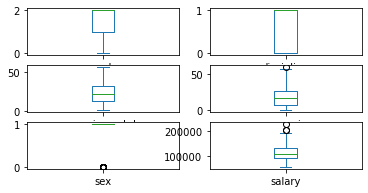

In [29]:
import warnings
warnings.filterwarnings('ignore')
df.plot(kind='box',subplots=True, layout=(4,2))

<AxesSubplot:>

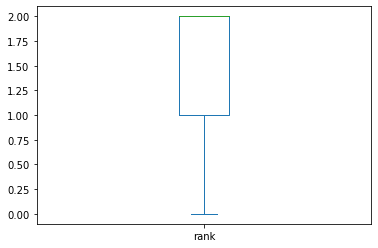

In [30]:
df['rank'].plot.box()

<AxesSubplot:>

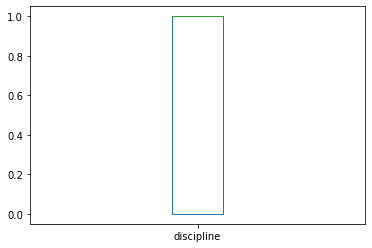

In [31]:
df['discipline'].plot.box()

<AxesSubplot:>

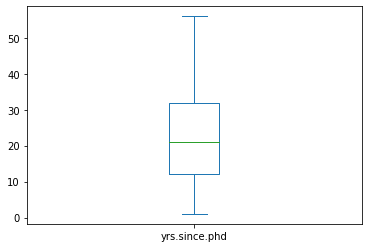

In [32]:
df['yrs.since.phd'].plot.box()

<AxesSubplot:>

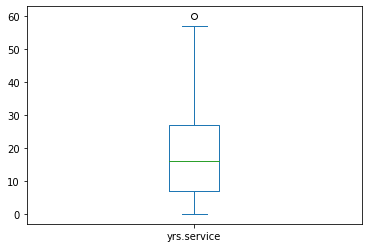

In [33]:
df['yrs.service'].plot.box()

<AxesSubplot:>

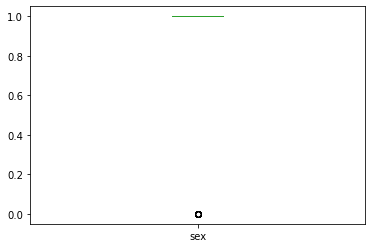

In [34]:
df['sex'].plot.box()

<AxesSubplot:>

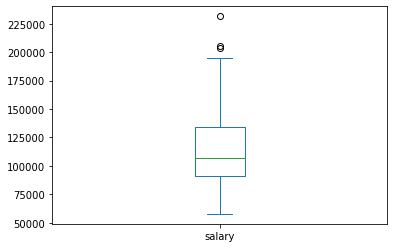

In [35]:
df['salary'].plot.box()

From the above analysis we can see that we have minimum outliers only in 2 columns that are Columns:-

* Salary
* Yrs.Service

In [36]:
df.skew()

rank            -1.151164
discipline      -0.177684
yrs.since.phd    0.300880
yrs.service      0.650569
sex             -2.709958
salary           0.714568
dtype: float64

Outcome of the skewness :- Skewness Threshold is taken as +/- 0.5..

Columns having Skewness are -

* Yrs.Service
* Sex
* Salary
* Rank

# Normal distribution Curve

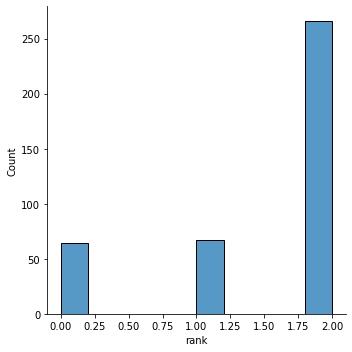

In [38]:
sns.displot(df["rank"])

The Data of the Column is Normal. Bt the curve is not Normal

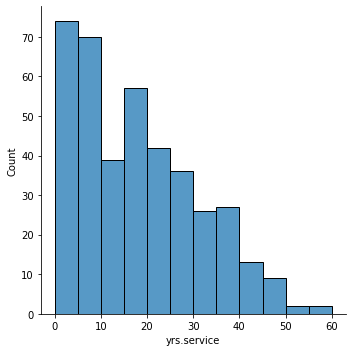

In [39]:
sns.displot(df["yrs.service"])

The Data of the Column is Normal. Bt the curve is not Normal

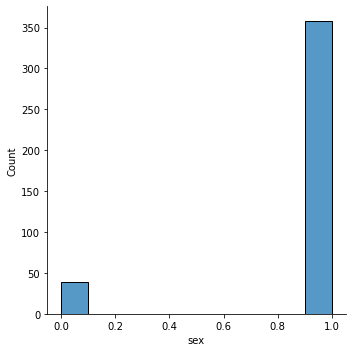

In [40]:
sns.displot(df["sex"])

The Data of the Column is Normal. Bt the curve is not Normal

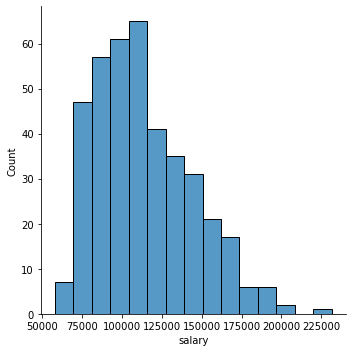

In [41]:
sns.displot(df["salary"])

The Data of the Column is Normal. Bt the curve is not Normal

# The Normal distribution Shows that the data is Skewwed

# Data Cleaning

In [42]:
df.corr()['salary']

rank             0.522207
discipline       0.156084
yrs.since.phd    0.419231
yrs.service      0.334745
sex              0.138610
salary           1.000000
Name: salary, dtype: float64

Here we are setting the Threshold of correlation as +/- 0.1.It is not standard.The Data set Demands it

In [43]:
df=df.drop(["sex"],axis=1)
df

,rank,discipline,yrs.since.phd,yrs.service,salary
0,2,1,19,18,139750
1,2,1,20,16,173200
2,1,1,4,3,79750
3,2,1,45,39,115000
4,2,1,40,41,141500
...,...,...,...,...,...
392,2,0,33,30,103106
393,2,0,31,19,150564
394,2,0,42,25,101738
395,2,0,25,15,95329


Removing the Least Correlated Column from the Dataset

# Removing Outliers

IQR Proximity Rule

Z - Score Technique

In [44]:
from scipy.stats import zscore
import numpy as np
z=np.abs(zscore(df))
z.shape

(397, 5)

In [45]:
threshold=3
print(np.where(z>3))

(array([ 43, 131, 330, 364], dtype=int64), array([4, 3, 3, 4], dtype=int64))


In [46]:
len(np.where(z>3)[0])

4

In [47]:
df.drop([43, 131, 330, 364],axis=0)

,rank,discipline,yrs.since.phd,yrs.service,salary
0,2,1,19,18,139750
1,2,1,20,16,173200
2,1,1,4,3,79750
3,2,1,45,39,115000
4,2,1,40,41,141500
...,...,...,...,...,...
392,2,0,33,30,103106
393,2,0,31,19,150564
394,2,0,42,25,101738
395,2,0,25,15,95329


In [48]:
df=df[(z<3).all(axis=1)]

In [49]:
df

,rank,discipline,yrs.since.phd,yrs.service,salary
0,2,1,19,18,139750
1,2,1,20,16,173200
2,1,1,4,3,79750
3,2,1,45,39,115000
4,2,1,40,41,141500
...,...,...,...,...,...
392,2,0,33,30,103106
393,2,0,31,19,150564
394,2,0,42,25,101738
395,2,0,25,15,95329


# Training the Model without Outliers

In [50]:
# independent Column
x=df.iloc[:,:-1]
# target
y=df.iloc[:,-1]

In [51]:
x.head()

,rank,discipline,yrs.since.phd,yrs.service
0,2,1,19,18
1,2,1,20,16
2,1,1,4,3
3,2,1,45,39
4,2,1,40,41


In [52]:
y.head()

0    139750
1    173200
2     79750
3    115000
4    141500
Name: salary, dtype: int64

In [53]:
x.shape

(393, 4)

In [54]:
y.shape

(393,)

# Transforming Data To Remove Skewness

In [55]:
from sklearn.preprocessing import power_transform
x=power_transform(x,method='yeo-johnson')

In [56]:
x

array([[ 0.69481738,  0.91457564, -0.11344983,  0.26888583],
       [ 0.69481738,  0.91457564, -0.03455335,  0.1209006 ],
       [-1.0753989 ,  0.91457564, -1.6242611 , -1.28449532],
       ...,
       [ 0.69481738, -1.09340328,  1.42772852,  0.72581897],
       [ 0.69481738, -1.09340328,  0.33874878,  0.04312953],
       [-1.0753989 , -1.09340328, -1.12908354, -1.11979784]])

In [57]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x=sc.fit_transform(x)
x

array([[ 0.69481738,  0.91457564, -0.11344983,  0.26888583],
       [ 0.69481738,  0.91457564, -0.03455335,  0.1209006 ],
       [-1.0753989 ,  0.91457564, -1.6242611 , -1.28449532],
       ...,
       [ 0.69481738, -1.09340328,  1.42772852,  0.72581897],
       [ 0.69481738, -1.09340328,  0.33874878,  0.04312953],
       [-1.0753989 , -1.09340328, -1.12908354, -1.11979784]])

# Since the Outcome is a Salary Value we will use Binary Regression Model

In [58]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error,mean_squared_error
from sklearn.metrics import r2_score

Importing ML Alogoritm Models

In [60]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression

Training And Splitting Data For Model Training

In [61]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.33,random_state=44)

In [62]:
x_train.shape

(263, 4)

In [63]:
y_train.shape

(263,)

In [64]:
x_test.shape

(130, 4)

In [65]:
y_test.shape

(130,)

# Linear Regression Model

In [66]:
lr=LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

In [67]:
lr.intercept_

112839.40179072611

In [68]:
lr.coef_

array([14241.76776736,  6978.54812995, 12180.82193579, -7689.75780259])

In [69]:
lr.score(x_train,y_train)

0.4204152826193812

In [70]:
pred=lr.predict(x_test)
print("predicted result ",pred)
print('actual result',y_test)

predicted result  [ 98660.49854297 122745.45431642 120017.14227901 120930.49968588
 122307.03378758  77745.00228981 124243.98745894 131140.39775115
 118336.03094152 141249.75575326 122281.53728825 135300.57872282
  86017.74538706 137618.31213832  78333.32546972 124686.63816906
 129796.59364088 111851.62221159  92202.63141463 125557.83498782
 127662.10611799 114320.75929156  76603.54495917 137307.32570581
  89095.41830567  94508.89463673  84616.89763982 132369.68017917
 124686.63816906 134015.16272069 126832.20877991 112398.73136915
 131497.28333863 115749.42363004  81440.04749472 121644.54289378
 110889.92438091  95464.47413812  92732.36941345 112615.90714013
  89095.41830567 117636.33194171 123746.70808938 126913.99700675
 114044.86512326  97840.24951627 103280.71647619 129286.27215546
 131497.28333863 115749.42363004 120903.42563648 122718.55227001
 117195.03663851 112027.33521957 122381.75322302 124596.8109586
  88331.77650926 124243.98745894 125966.20610981 132744.03847949
  93998.

In [71]:
print('Error:')
print('Mean Absolute Error :',mean_absolute_error(y_test,pred))
print('Mean Squared Error :',mean_squared_error(y_test,pred))
print('Root mean Squared Error',np.sqrt(mean_squared_error(y_test,pred)))
print('r2 score :',r2_score(y_test,pred))

Error:
Mean Absolute Error : 17769.8453972219
Mean Squared Error : 498902872.08803874
Root mean Squared Error 22336.1337766418
r2 score : 0.42061352004802344


# Decission Tree Model

In [72]:
dtr=DecisionTreeRegressor()
dtr.fit(x_train,y_train)
dtr.score(x_train,y_train)

0.962970523175513

In [73]:
predr=dtr.predict(x_test)
print("predicted result ",predr)
print('actual result',y_test)

predicted result  [ 88825.   150917.    81700.   127257.5   67559.    74830.   111512.
 101000.   125192.    57800.   204000.   146856.    78500.   150743.
  83850.   130925.   107500.   103700.    90971.   121466.5  140096.
 113068.    74830.   165000.   113600.   105350.    97000.   140310.
 130925.   175000.   134778.    96938.   181257.   115800.    72750.
  67559.   104350.    80225.    92350.   126882.   113600.   134690.
 174500.   168635.   148800.    95611.    79858.   145098.   181257.
 115800.   101036.   109954.    93000.   148800.   131950.   130664.
  70700.   111512.    57800.   140310.    83558.25 127257.5  117704.
 130664.   189409.   105350.   116518.   106294.   145098.   101036.
 181257.   102600.    57800.    79858.    77517.5  181257.   121200.
 161101.   100102.   121466.5   92000.    71350.   161101.    70700.
  96545.   166605.   145098.    88175.   109646.    86250.    67559.
  74000.    70768.   100938.    92000.   165000.   131950.   101299.
 113600.    7985

In [74]:
print('Error:')
print('Mean Absolute Error :',mean_absolute_error(y_test,predr))
print('Mean Squared Error :',mean_squared_error(y_test,predr))
print('Root mean Squared Error',np.sqrt(mean_squared_error(y_test,predr)))
print('r2 score :',r2_score(y_test,predr))

Error:
Mean Absolute Error : 23695.201923076922
Mean Squared Error : 1049843057.23125
Root mean Squared Error 32401.281722043805
r2 score : -0.21920499452225672


# K- Nieghbour Regression Model

In [75]:
knr=KNeighborsRegressor(n_neighbors=5)
knr.fit(x_train,y_train)
knr.score(x_train,y_train)

0.6281454619934101

In [76]:
predknr=knr.predict(x_test)
print("predicted result ",predknr)
print('actual result',y_test)

predicted result  [ 83127.2 141054.2 100745.8 126444.8 102790.6  88830.6 135919.  148814.
 115670.4 118123.  117767.8 118123.   76267.  124101.6  89180.8 121765.2
 117704.4 104917.   89554.2 127340.8 135748.  104448.8  88830.6 142365.6
  98955.2  99812.4 102466.4 127161.2 121765.2 144165.8 130551.2 101749.8
 150877.8 126635.8  73700.  102790.6 112972.   84259.4  89830.  122978.6
  98955.2 109711.8 121908.2 145216.  112673.6 101235.   79370.2 153674.2
 150877.8 126635.8 127260.2 109584.2 108730.  114265.  124363.8 127089.4
  73160.  135919.   94143.4 132623.   83322.4 116774.8 147470.2 124199.4
 125163.  100862.4 127047.2 110750.4 125027.  110130.6 146397.8 117255.8
  94143.4  88386.6  76267.  150877.8 126624.4 146254.   89000.4 127340.8
  83770.   75247.  155391.6  76277.  132795.6 154320.8 155079.6 117039.2
 114233.6 106144.2 102790.6  78907.   85095.8  96422.8  85404.  140614.6
 113246.  101041.8  98955.2  79370.2  73700.  155079.6 157935.  110168.8
  74000.  127922.2 138485.   76267

In [77]:
print('Error:')
print('Mean Absolute Error :',mean_absolute_error(y_test,predknr))
print('Mean Squared Error :',mean_squared_error(y_test,predknr))
print('Root mean Squared Error',np.sqrt(mean_squared_error(y_test,predknr)))
print('r2 score :',r2_score(y_test,predknr))

Error:
Mean Absolute Error : 16653.35230769231
Mean Squared Error : 523929761.4852308
Root mean Squared Error 22889.51204122165
r2 score : 0.39154926292859804


# Support Vector Regression Model

KERNEL = RBF

In [78]:
svr=SVR(kernel='rbf')
svr.fit(x_train,y_train)
svr.score(x_train,y_train)

-0.028991197007036007

KERNEL = POLY

In [79]:
svp=SVR(kernel='poly')
svp.fit(x_train,y_train)
svp.score(x_train,y_train)

-0.028653310073450733

KERNEL = LINEAR

In [80]:
svl=SVR(kernel='poly')
svl.fit(x_train,y_train)
svl.score(x_train,y_train)

-0.028653310073450733

Since the model score of all the Kernel of the model are in negative we dont move further with this model

# Cross Validation Score

In [82]:
from sklearn.model_selection import cross_val_score
j=[lr,dtr,knr,svr]
for n in j:
  print('Cross_Validation_score of',n,'is')
  score=cross_val_score(n,x,y,cv=6)
  print(score)
  print(score.mean())
  print(score.std())
  print('\n')

Cross_Validation_score of LinearRegression() is
[0.32068983 0.51823966 0.41472994 0.40814311 0.24836014 0.36247348]
0.3787726919349539
0.08391791484158787


Cross_Validation_score of DecisionTreeRegressor() is
[-0.00801914  0.22979659  0.25668686 -0.18028072 -0.00135246 -0.51310568]
-0.03604575862308682
0.26036626297134796


Cross_Validation_score of KNeighborsRegressor() is
[0.29392768 0.43878182 0.47674851 0.38114478 0.31459909 0.27711337]
0.36371920887320486
0.07471934494141944


Cross_Validation_score of SVR() is
[-0.00119103 -0.00313292 -0.1245667  -0.01696764 -0.05204068 -0.22520958]
-0.070518090707401
0.08104193887325291




In [83]:
from sklearn.model_selection import KFold
j=[lr,dtr,knr,svr]
for n in j:
  print('K_Fold',n,'is')
  Kfold=KFold(5)
  score=cross_val_score(n,x,y,cv=Kfold)
  print(score)
  print(score.mean())
  print(score.std())
  print('\n')

K_Fold LinearRegression() is
[0.24849052 0.57491121 0.41012385 0.26059421 0.31281385]
0.3613867271274098
0.12102232863596529


K_Fold DecisionTreeRegressor() is
[-0.32685323  0.2684247   0.06890776 -0.11496234 -0.5586817 ]
-0.13263295975700184
0.2901782893579827


K_Fold KNeighborsRegressor() is
[0.11313965 0.59811954 0.40137383 0.27563485 0.28285208]
0.3342239876516308
0.1606860336749838


K_Fold SVR() is
[ 0.00158844 -0.00698975 -0.12816237 -0.00413057 -0.2510532 ]
-0.07774949026333819
0.0992943385367589




# Saving The Best Model

In [84]:
import joblib
joblib.dump(knr,'Knr_File_Salary_Report.obj')

['Knr_File_Salary_Report.obj']